## Srinidhi Bharadwaj Kalgundi Srinivas

## Problem 7

In [1]:
import numpy as np 
import open3d as o3d

bunnies = np.load(
    'bunnies.npy', allow_pickle=True).tolist()

array_p_Om = bunnies['array_p_Om'] # 3 x 1000
array_p_s = bunnies['array_p_s'] # 3 x 1000

In [2]:
p_Om_pcd = o3d.geometry.PointCloud()
p_Om_pcd.points = o3d.utility.Vector3dVector(array_p_Om.T)
p_Om_pcd.paint_uniform_color([1., 0, 0]) # red

PointCloud with 1000 points.

In [4]:
o3d.visualization.draw_geometries([p_Om_pcd])

[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display
[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display


In [3]:
p_s_pcd = o3d.geometry.PointCloud()
p_s_pcd.points = o3d.utility.Vector3dVector(array_p_s.T)
p_s_pcd.paint_uniform_color([0, 1, 0]) # green

PointCloud with 1000 points.

In [80]:
o3d.visualization.draw_geometries([
    p_Om_pcd, p_s_pcd
])

[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display


In [4]:
import numpy as np
# Solve for R_star and t_star by yourself here 
R_star = np.array(
    [[1, 0, 0],
    [0, 1, 0],
    [0, 0, 1]], dtype=np.float64)

p_star = np.zeros((3, 1))

# Using rigid transform method

# Find the centroids of the x, y and z co-oridinates
# Calculate the covariance matrix as (A-centroid_a) x (B-centroid_b).T
# Decompose the matrix into into constituent factors using SVD
# Calculate the rotation R_star as V.T x U.T
# Calculate the translation p_star as centroid_b - R_star x centroid_a

centroid_a = ((1/1000) * np.sum(array_p_Om, axis=1)).reshape(-1,1) #Scaling factor of 1000 because there are 1K points
centroid_b = ((1/1000) * np.sum(array_p_s, axis=1)).reshape(-1,1)
#Calculate the Co-variance matrix (a-centroid)*(b-centroid).T
covariance_matrix = np.matmul(array_p_Om-centroid_a, (array_p_s-centroid_b).T)
U, S, V = np.linalg.svd(covariance_matrix, full_matrices=True) #SVD is calculated

R_star = np.matmul(V.T, U.T)
p_star = centroid_b - np.matmul(R_star, centroid_a)



In [5]:
array_transformed_p_Om = R_star @ array_p_Om + p_star

In [6]:
array_transformed_p_Om - array_p_s, np.linalg.norm(array_transformed_p_Om - array_p_s, axis=0).mean()

(array([[ 0.00022377,  0.00333162, -0.0059356 , ...,  0.00381533,
         -0.00945231, -0.00204837],
        [ 0.0088568 , -0.00171926, -0.00594071, ...,  0.0012071 ,
         -0.00563959, -0.00521303],
        [-0.0032335 ,  0.00014694,  0.00616176, ...,  0.00780524,
          0.00715443, -0.00025071]]),
 0.008165067982892333)

In [7]:
transformed_p_Om_pcd = o3d.geometry.PointCloud()
transformed_p_Om_pcd.points = o3d.utility.Vector3dVector(array_transformed_p_Om.T)
transformed_p_Om_pcd.paint_uniform_color([0, 0, 1]) # blue

PointCloud with 1000 points.

In [ ]:
o3d.visualization.draw_geometries([
    transformed_p_Om_pcd, p_s_pcd
])

### Point cloud aligned image with rigid transform:

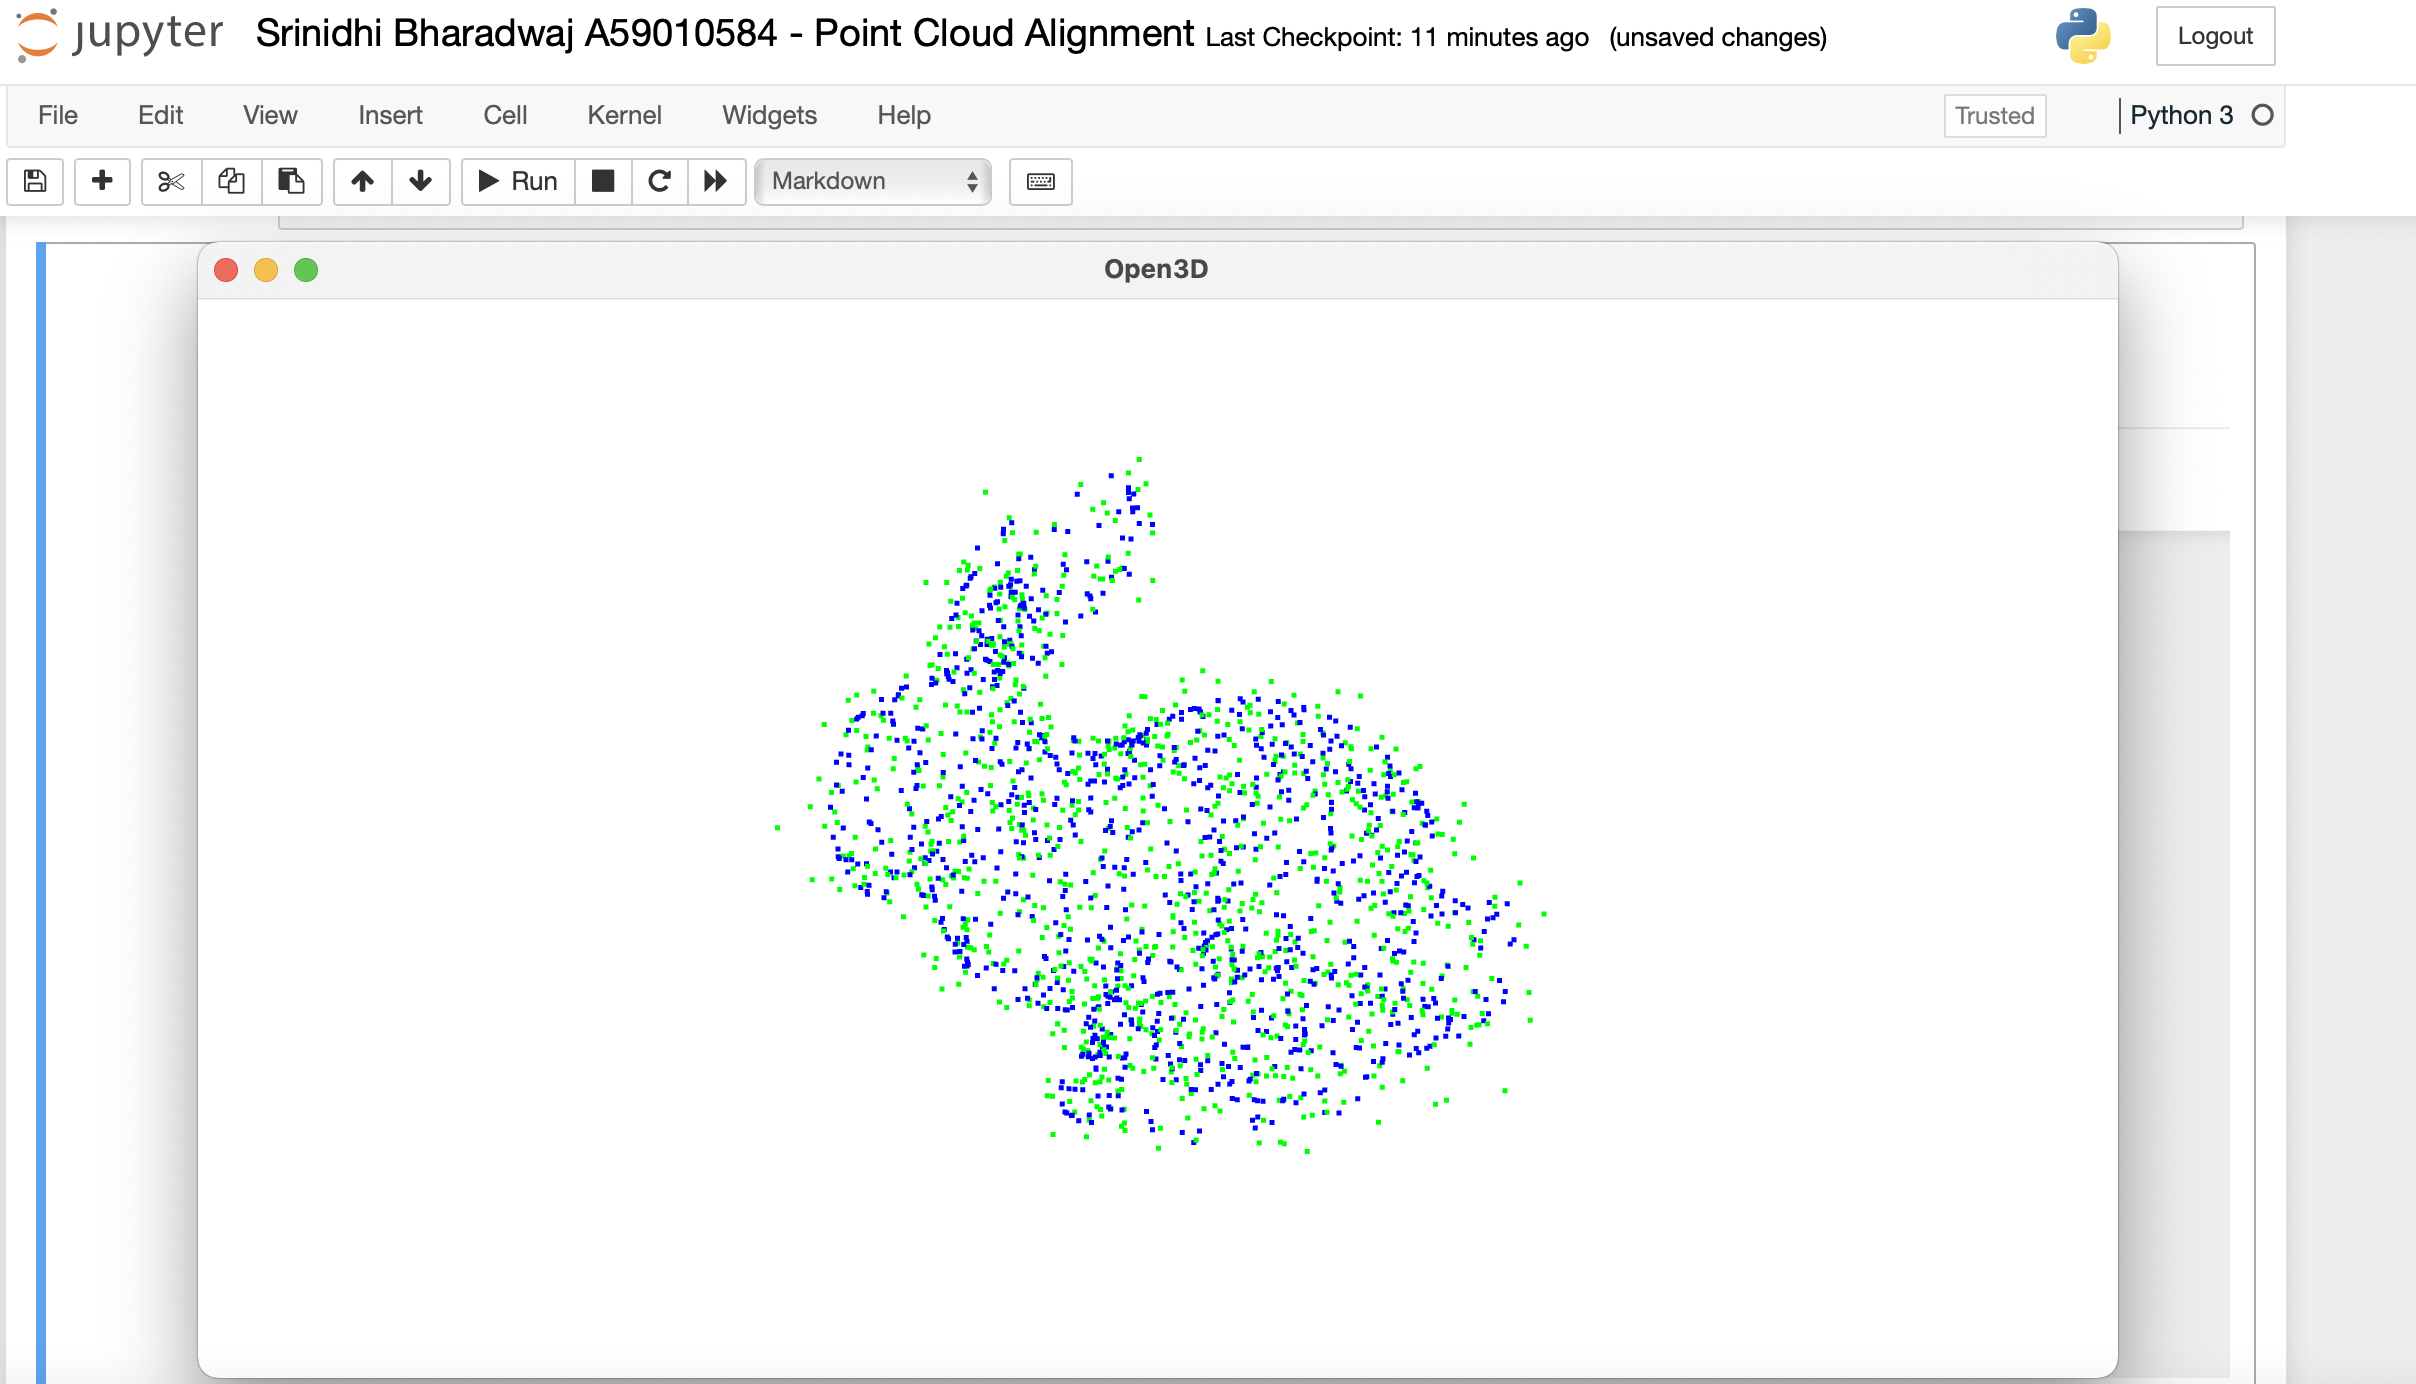